In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import os

from preprocessing import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print(os.getcwd())

/Users/lijialin/Desktop/Research/proj-two-stage-task/Tree3


In [2]:
with open("data/Tree3_v3.json", "r") as f_real:
    real_data = [json.loads(line) for line in f_real]
for entry in real_data:
    entry["source"] = "Human"

with open("data/rss/model1_RSS.json", "r") as f_sim:
    model1_data = [json.loads(line) for line in f_sim]
for entry in model1_data:
    entry["source"] = "model1"

with open("data/rss/model2_RSS.json", "r") as f_sim:
    model2_data = [json.loads(line) for line in f_sim]
for entry in model2_data:
    entry["source"] = "model2"

with open("data/rss/model3_RSS.json", "r") as f_sim:
    model3_data = [json.loads(line) for line in f_sim]
for entry in model3_data:
    entry["source"] = "model3"

with open("data/rss/model4_RSS.json", "r") as f_sim:
    model4_data = [json.loads(line) for line in f_sim]
for entry in model4_data:
    entry["source"] = "model4"

with open("data/rss/model5_RSS.json", "r") as f_sim:
    model5_data = [json.loads(line) for line in f_sim]
for entry in model5_data:
    entry["source"] = "model5"

with open("data/rss/model6_RSS.json", "r") as f_sim:
    model6_data = [json.loads(line) for line in f_sim]
for entry in model6_data:
    entry["source"] = "model6"

# with open("data/pda/model6_pda.json", "r") as f_sim:
#     model1_data_pda = [json.loads(line) for line in f_sim]
# for entry in model1_data_pda:
#     entry["source"] = "model1_pda"

# with open("data/rss/model6_RSS.json", "r") as f_sim:
#     model6_data = [json.loads(line) for line in f_sim]
# for entry in model6_data:
#     entry["source"] = "model6"

# with open("data/Tree1_sim/simulated_v3_model7.json", "r") as f_sim:
#     model7_data = [json.loads(line) for line in f_sim]
# for entry in model7_data:
#     entry["source"] = "model7"

df = real_data + model1_data + model2_data + model3_data + model4_data + model5_data + model6_data
df = pd.DataFrame(df)
df[['correct1', 'correct2', 'correct_all']] = df[['correct1', 'correct2', 'correct_all']].astype(bool)
df.head()

,wid,paths,path_rewards,visit_states,value1,value2,value3,choice1,choice2,choice3,...,diff1,diff2,difficulty,correct1,correct2,correct_all,subtree_relation,source,path,rewards
0,w3311b34,"[[1, 8, 2], [1, 8, 5], [1, 6, 3], [1, 6, 7], [...","[5, 2, 3, -2, -1]","[1, 2, 8]","[2, 0, -4]","[3, 0, 3, -2, 3]",[],1,1,NaN,...,4.5,3.0,4.5,True,True,True,3,Human,NaN,NaN
1,w3311b34,"[[9, 3, 8], [9, 3, 7], [9, 4, 5], [9, 4, 2], [...","[8, 7, -5, -5, -4]","[3, 8, 9]","[4, -1, -1]","[4, 3, -4, -4, -3]",[],1,1,NaN,...,10.0,1.0,10.0,True,True,True,2,Human,NaN,NaN
2,w3311b34,"[[4, 7, 3], [4, 7, 0], [4, 9, 6], [4, 9, 1], [...","[-3, -5, 4, 3, 5]","[4, 6, 9]","[-4, 2, 1]","[1, -1, 2, 1, 4]",[],2,3,NaN,...,5.0,1.0,5.0,False,True,False,1,Human,NaN,NaN
3,w3311b34,"[[6, 9, 3], [6, 9, 4], [6, 0, 5], [6, 0, 2], [...","[-2, 1, 1, 2, 3]","[0, 2, 6]","[-3, 4, 0]","[1, 4, -3, -2, 3]",[],2,4,NaN,...,2.5,1.0,2.5,False,True,False,1,Human,NaN,NaN
4,w3311b34,"[[2, 7, 8], [2, 7, 9], [2, 0, 3], [2, 0, 1], [...","[1, -1, 6, 6, 1]","[0, 2, 3]","[0, 4, 1]","[1, -1, 2, 2, 0]",[],2,3,NaN,...,4.0,0.0,4.0,True,True,True,2,Human,NaN,NaN


In [7]:
Human_data = pd.DataFrame(real_data)
Human_data

,wid,paths,path_rewards,visit_states,value1,value2,value3,choice1,choice2,choice3,...,version,best_path_idx,diff1,diff2,difficulty,correct1,correct2,correct_all,subtree_relation,source
0,w3311b34,"[[1, 8, 2], [1, 8, 5], [1, 6, 3], [1, 6, 7], [...","[5, 2, 3, -2, -1]","[1, 2, 8]","[2, 0, -4]","[3, 0, 3, -2, 3]",[],1,1,None,...,5.1,0,4.5,3.0,4.5,1,1,1,3,Human
1,w3311b34,"[[9, 3, 8], [9, 3, 7], [9, 4, 5], [9, 4, 2], [...","[8, 7, -5, -5, -4]","[3, 8, 9]","[4, -1, -1]","[4, 3, -4, -4, -3]",[],1,1,None,...,5.1,0,10.0,1.0,10.0,1,1,1,2,Human
2,w3311b34,"[[4, 7, 3], [4, 7, 0], [4, 9, 6], [4, 9, 1], [...","[-3, -5, 4, 3, 5]","[4, 6, 9]","[-4, 2, 1]","[1, -1, 2, 1, 4]",[],2,3,None,...,5.1,4,5.0,1.0,5.0,0,1,0,1,Human
3,w3311b34,"[[6, 9, 3], [6, 9, 4], [6, 0, 5], [6, 0, 2], [...","[-2, 1, 1, 2, 3]","[0, 2, 6]","[-3, 4, 0]","[1, 4, -3, -2, 3]",[],2,4,None,...,5.1,4,2.5,1.0,2.5,0,1,0,1,Human
4,w3311b34,"[[2, 7, 8], [2, 7, 9], [2, 0, 3], [2, 0, 1], [...","[1, -1, 6, 6, 1]","[0, 2, 3]","[0, 4, 1]","[1, -1, 2, 2, 0]",[],2,3,None,...,5.1,2,4.0,0.0,4.0,1,1,1,2,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,w3a14c7d,"[[8, 6, 5], [8, 6, 3], [8, 10, 9], [8, 10, 2],...","[1, 2, 3, -2, -1]","[8, 6, 3]","[3, -1, 2]","[-2, -1, 4, -1, -3]",[],1,2,None,...,7.1,2,3.0,1.0,3.0,0,1,0,5,Human
1567,w3a14c7d,"[[1, 9, 8], [1, 9, 7], [1, 4, 3], [1, 4, 6], [...","[1, 4, 4, 0, 3]","[1, 9, 7]","[1, 2, 1]","[0, 3, 2, -2, 2]",[],1,2,None,...,7.1,1,2.0,3.0,2.0,1,1,1,4,Human
1568,w3a14c7d,"[[3, 1, 6], [3, 1, 0], [3, 4, 10], [3, 4, 2], ...","[-1, -4, 4, 2, -5]","[3, 4, 10]","[0, 0, -1]","[-1, -4, 4, 2, -4]",[],2,3,None,...,7.1,2,6.0,2.0,6.0,1,1,1,2,Human
1569,w3a14c7d,"[[0, 3, 6], [0, 3, 8], [0, 1, 9], [0, 1, 5], [...","[2, -2, -6, -1, 1]","[0, 3, 6]","[1, -2, 4]","[1, -3, -4, 1, -3]",[],1,1,None,...,7.1,0,4.0,4.0,4.0,1,1,1,4,Human


In [5]:
Human_data = pd.DataFrame(real_data)
Human_data['wid'].unique()

array(['w3311b34', 'w519d4bd', 'w43e3f81', 'w51f9202', 'w22c2de9',
       'w208989a', 'w441e62d', 'wb785fe7', 'we70c19e', 'w180d9ac',
       'w7029a49', 'w0f1d59d', 'w7c740c6', 'wc0a0ad0', 'wbfc8327',
       'w68dc8fe', 'w16e12b3', 'w7b3a102', 'w9588697', 'w3b99865',
       'w17557da', 'wdec2c17', 'w3a14c7d'], dtype=object)

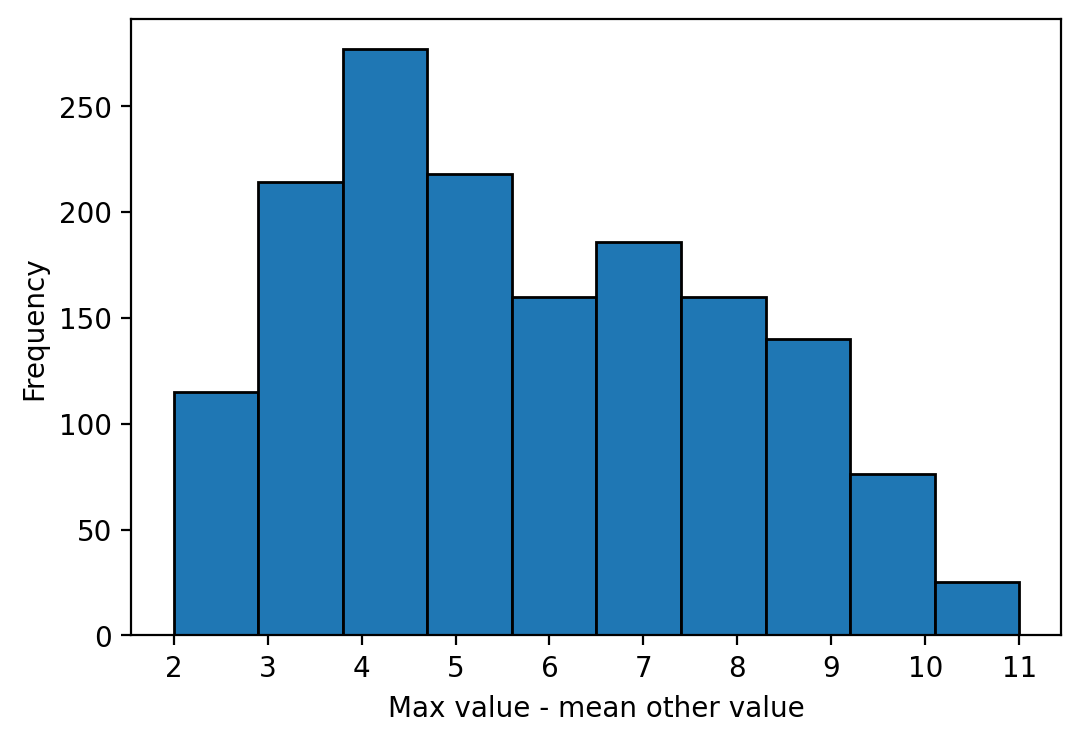

In [3]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("Max value - mean other value")
plt.ylabel("Frequency")
# plt.grid(True)
plt.xticks(range(2, 12, 1))
plt.show()

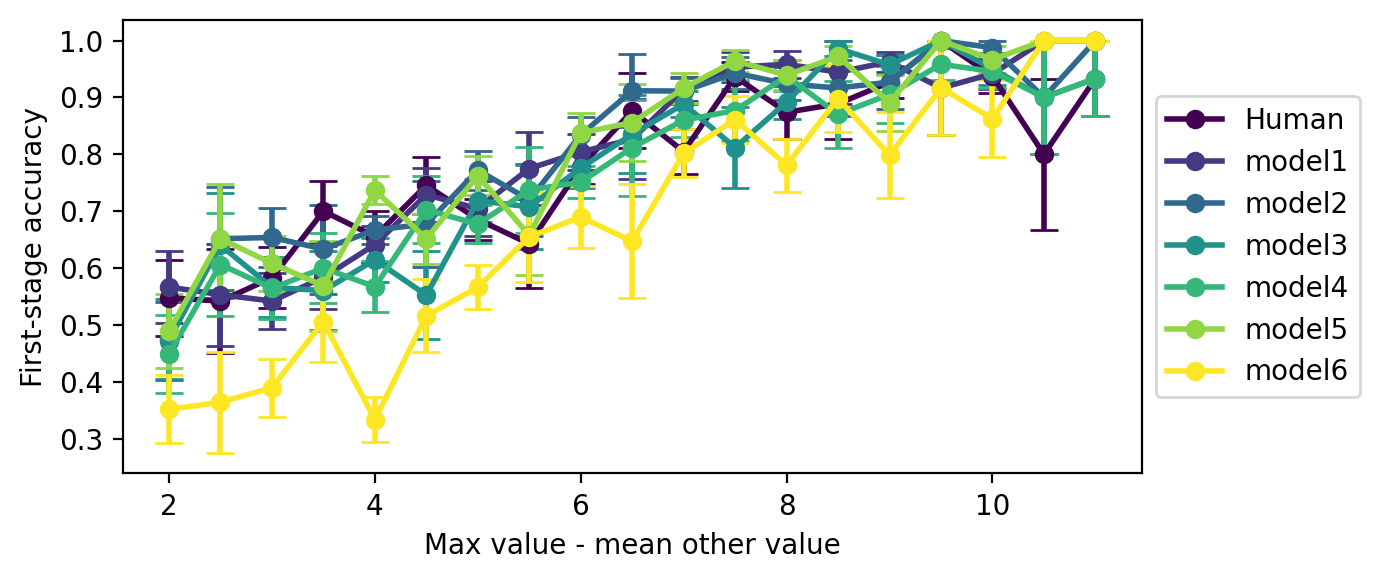

In [4]:
per1 = (
    df.groupby(['source','wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

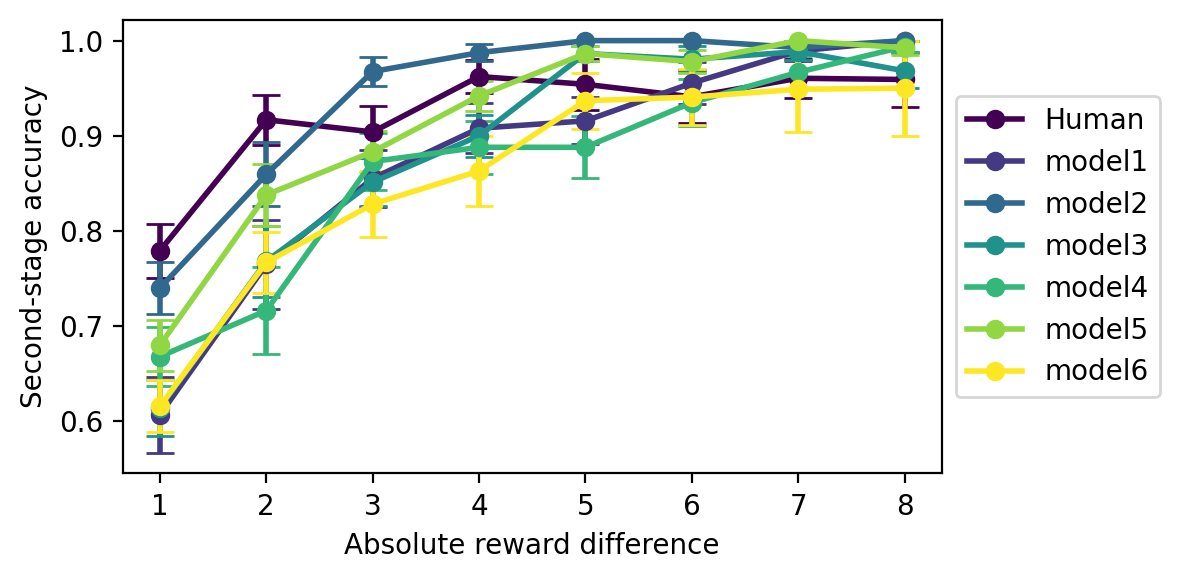

In [5]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# b) Second‐stage accuracy by diff2
per2 = (
    subdf.groupby(['source','wid','diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby(['source','diff2'])['accuracy2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

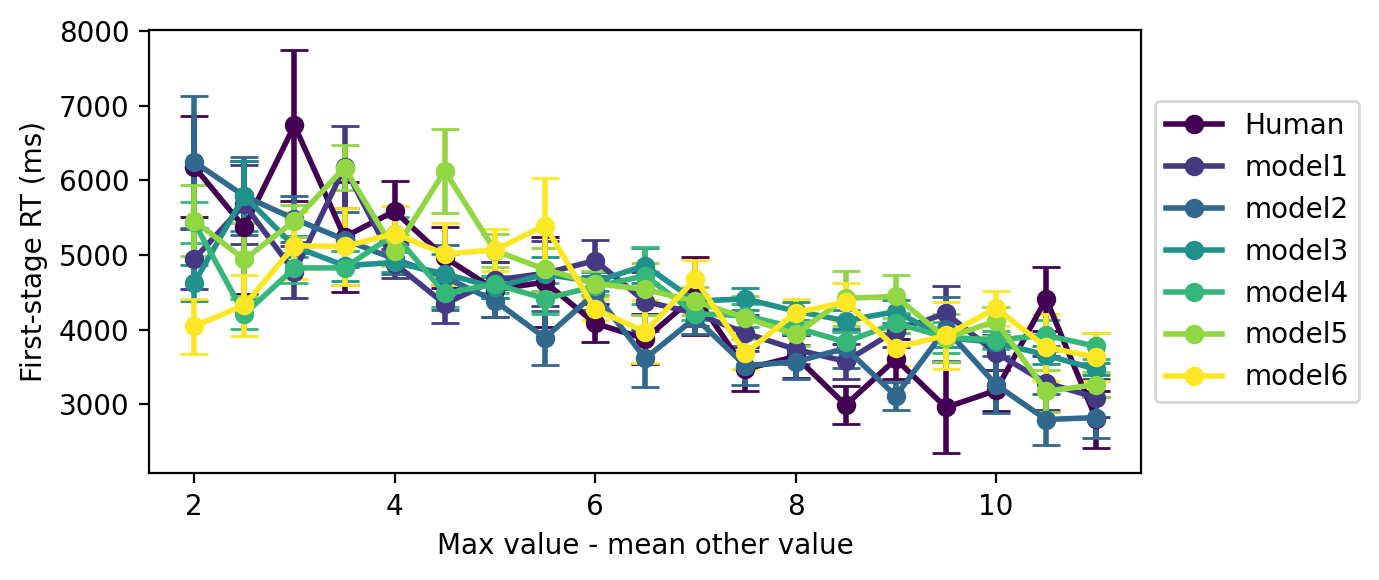

In [6]:
# c) First‐stage RT (mean) for correct trials by diff1
rt1 = (
    df[df['correct1']]
      .groupby(['source','wid','diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt1.groupby(['source','diff1'])['mean_rt1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Setup colormap (modern API, no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

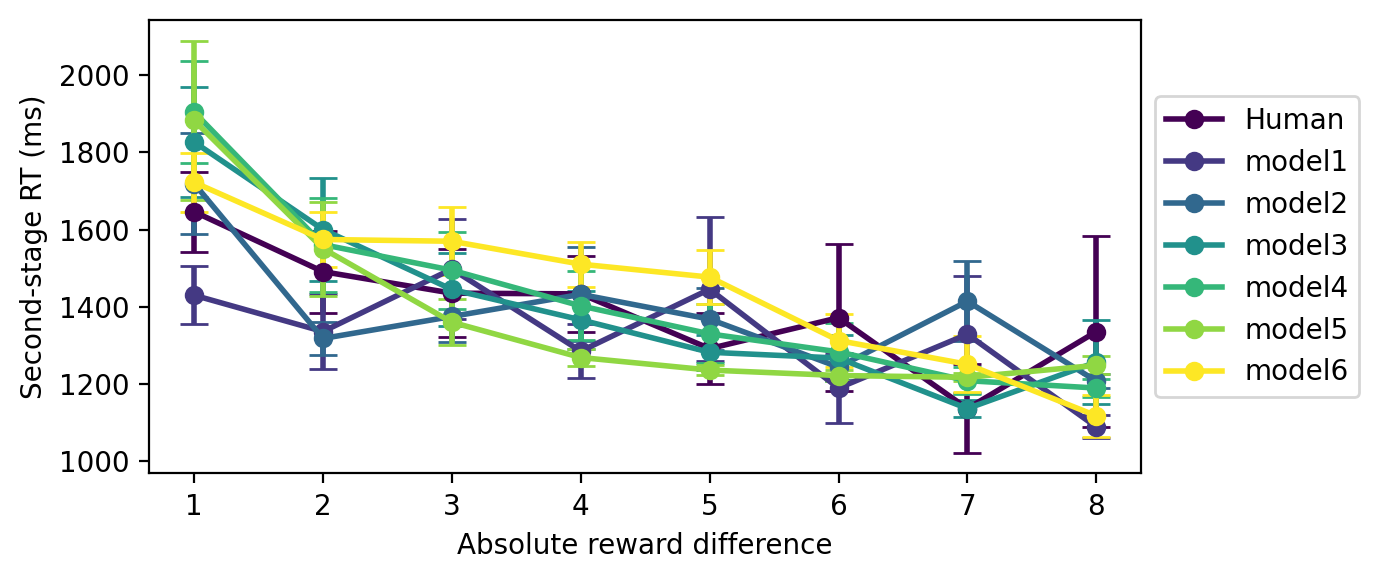

In [7]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    subdf[subdf['correct2']]
      .groupby(['source','wid','diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby(['source','diff2'])['mean_rt2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

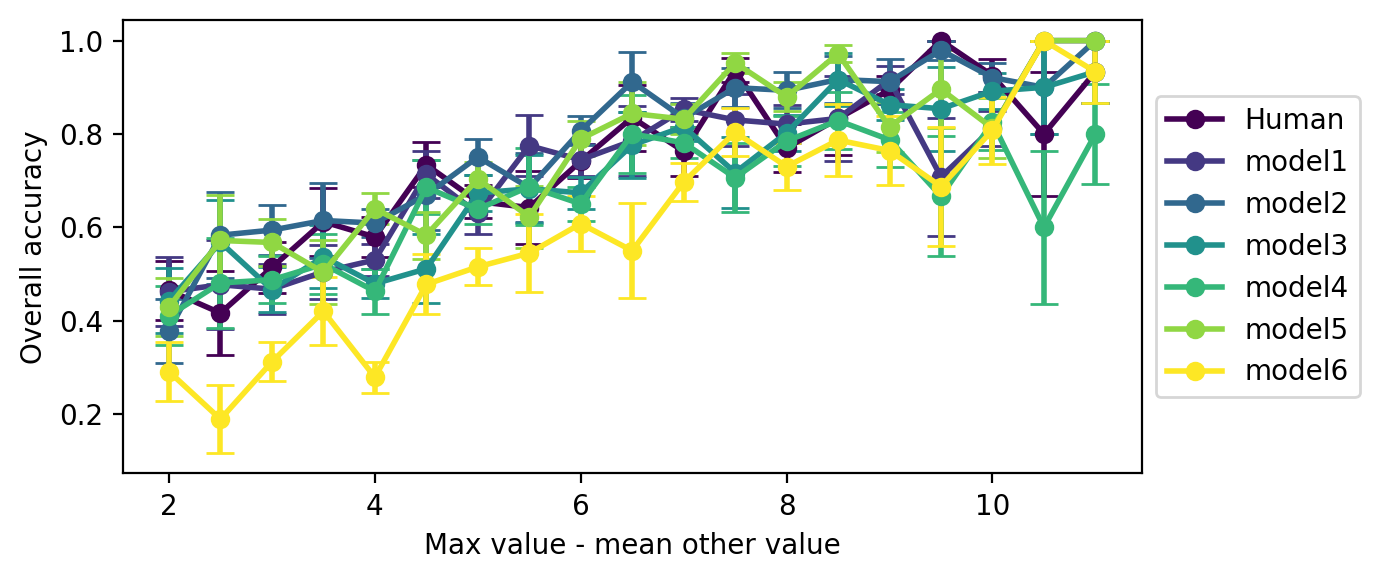

In [8]:
subdf = df.copy()
subdf = subdf[subdf['diff1'] != -1]

per1 = (
    subdf.groupby(['source','wid','diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap (modern API, gradient coloring)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')

# Optional: ax.set_ylim(0, 1)

# 5. Color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

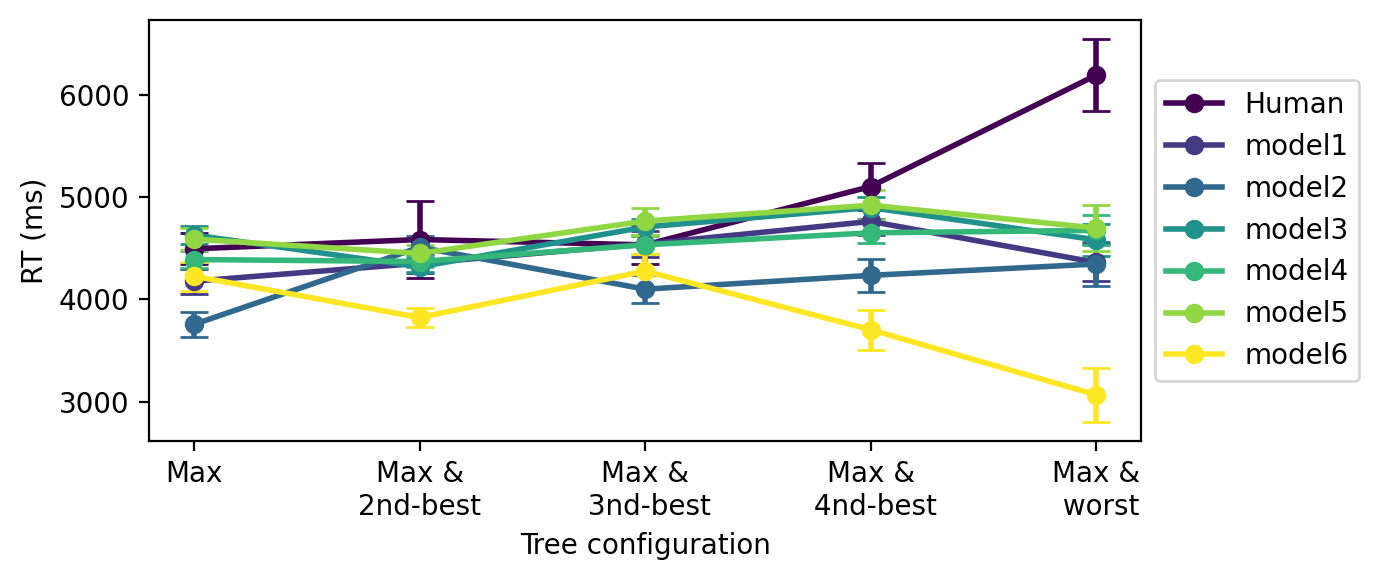

In [9]:
# 1. Compute mean and SEM of RT1 per source × subtree_relation
stats = df.groupby(['source', 'subtree_relation'])['rt1'].agg(['mean', 'sem']).reset_index()

# 2. Setup colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['subtree_relation'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

# 4. Label formatting
ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['Max', 'Max &\n2nd-best', 'Max &\n 3nd-best', 'Max &\n 4nd-best', 'Max &\n worst'])
ax.set_ylabel('RT (ms)')

# 5. Custom color-coded legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
